#### Problem Statment:
    - Classify 2 different art periods using convolutional neural networks. The art periods I have choosen are impressionism and romanticism.

#### Overview:
    - Looking at the metadata of the images, I will pick two periods that are similar yet different. I choose impressionism, and romanticism for the following reasons:
        - The classes are fairly balanced.
        - Both the Romanticism and Impressionist styles were around the same time and the same place.
        - Both periods have similar but different influences.
        
#### Proposed Methods & Model:
    - I will use convolutional neural network in a seperate jupyter notebook. The image preprocessing and data agumentation is done by ImageDataGenerator.
    
#### Data:
    - The link to the dataset from kaggle:
    https://www.kaggle.com/c/painter-by-numbers/data
    
    - I uploaded the metadata to see what are the periods and artist, which is how I was able to identify which periods I will be looking at. Next I will start to separate the images and metadata for my project into their own folders.
    

In [1]:
#capstone eda from csv file

In [1]:
import pandas as pd
import os

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)

In [2]:
# read in the meta data
df_all = pd.read_csv('./all_data_info.csv')

- Commented out code that produced a large output.

In [3]:
# Looking at all the artist and the amount of works for each artist.

#df_all['artist'].value_counts()

In [4]:
# Looking at all the styles and the amount of styles for each category
# Here I chose my top 3 which are Impressionism, Realism, Romanticism.
# They have similaries and differences, and not a large class imbalance.

#df_all['style'].value_counts()

In [5]:
df_all.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [6]:
# creating a new dataframe with style and new_filename next to each other
df_all_1 = df_all[['style', 'new_filename', 'title', 'source', 'size_bytes',
                  'pixelsy', 'pixelsx', 'genre', 'date', 'artist']]

In [11]:
df_all_1.head(2)

,style,new_filename,title,source,size_bytes,pixelsy,pixelsx,genre,date,artist
9,Romanticism,84512.jpg,Procession in Naples,wikiart,7896792.0,7352.0,6238.0,cityscape,NaN,Franz Richard Unterberger
14,Romanticism,99442.jpg,Storm at sea,wikiart,3189597.0,5811.0,7444.0,marina,1873,Ivan Aivazovsky


- Creating a new DF with the styles that I am exploring

In [12]:
#df_all_1.drop
# creating new variable excludes the styles I am interested in and then dorpping it.
indexNames = df_all_1[(df_all_1['style'] != 'Romanticism') & (df_all_1['style'] != 'Impressionism')].index

# Delete these row indexes from dataFrame
df_all_1.drop(indexNames , inplace=True)

In [16]:
df_all_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19928 entries, 9 to 103232
Data columns (total 10 columns):
style           19928 non-null object
new_filename    19928 non-null object
title           19928 non-null object
source          19928 non-null object
size_bytes      19928 non-null float64
pixelsy         19928 non-null float64
pixelsx         19928 non-null float64
genre           19882 non-null object
date            14819 non-null object
artist          19928 non-null object
dtypes: float64(3), object(7)
memory usage: 1.7+ MB


In [10]:
df_all_1.head(2)

,style,new_filename,title,source,size_bytes,pixelsy,pixelsx,genre,date,artist
9,Romanticism,84512.jpg,Procession in Naples,wikiart,7896792.0,7352.0,6238.0,cityscape,NaN,Franz Richard Unterberger
14,Romanticism,99442.jpg,Storm at sea,wikiart,3189597.0,5811.0,7444.0,marina,1873,Ivan Aivazovsky


In [11]:
# Checking to make sure the styles I want are created
df_all_1['style'].value_counts()

Impressionism    10643
Romanticism       9285
Name: style, dtype: int64

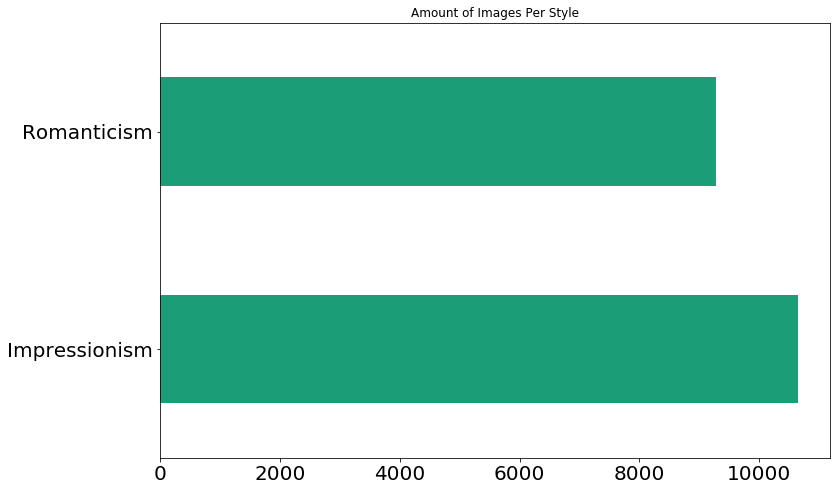

In [40]:
values_style = pd.value_counts(df_all_1['style'].values, sort=True)
values_style.plot(kind='barh',
                  title ="Amount of Images Per Style",
                  fontsize = 20,
                  cmap = 'Dark2',
                  figsize=(12,8));
#values_style.plot.barh();

In [12]:
# saving the dataframe 
#df_all_1.to_csv('./updated_all_data.csv', index=False) 

- the code above was already ran prior.

In [23]:
# df_all_1['artist'].value_counts()

created masks to search for different images that are well known in each style, or by artist that are well known.
- I wanted to locate the most famous paintings and compare if they are going to be in the predited class. If they are if the predictions were correct, and to create graphs of the RGB values of each.

In [47]:
mask2 = ((df_all_1['style'] == 'Impressionism') & (df_all_1['artist'] == 'Claude Monet') & (df_all_1['title'].str.contains("Camille")))

In [48]:
df_all_1[mask2]

,style,new_filename,title,source,size_bytes,pixelsy,pixelsx,genre,date,artist
1580,Impressionism,61167.jpg,Camille Monet and a Child in the Artist’s Gard...,wikiart,4166741.0,2586.0,3060.0,portrait,1875,Claude Monet
2529,Impressionism,35377.jpg,Camille Monet in the Garden at the House in Ar...,wikiart,2569609.0,3000.0,2184.0,landscape,1876,Claude Monet
9751,Impressionism,54749.jpg,Camille Monet in the Garden,wikiart,1042301.0,1485.0,2000.0,portrait,1873,Claude Monet
9769,Impressionism,37640.jpg,Camille and Jean Monet in the Garden at Argent...,wikiart,368358.0,1997.0,1486.0,genre painting,1873,Claude Monet
11182,Impressionism,88147.jpg,Camille on the Beach at Trouville,wikiart,839352.0,1478.0,1800.0,portrait,1870,Claude Monet
12576,Impressionism,31858.jpg,"Camille Monet at the Window, Argentuile",wikiart,855626.0,1701.0,1392.0,portrait,1873,Claude Monet
15673,Impressionism,24910.jpg,Camille with Green Parasol,wikiart,656337.0,1600.0,1159.0,portrait,1876,Claude Monet


In [66]:
mask3 = ((df_all_1['style'] == 'Romanticism') & (df_all_1['artist'].str.contains("Delacroix")) & (df_all_1['title'].str.contains("Death")))

In [67]:
df_all_1[mask3]

,style,new_filename,title,source,size_bytes,pixelsy,pixelsx,genre,date,artist
13182,Romanticism,90455.jpg,Death of Sardanapalus,wikiart,2698378.0,1333.0,1679.0,mythological painting,1827,Eugene Delacroix
30142,Romanticism,56858.jpg,The Death of Ophelia,wikiart,189174.0,900.0,1096.0,literary painting,1838,Eugene Delacroix
40876,Romanticism,43181.jpg,Sketch for The Death of Sardanapalus,wikiart,108225.0,770.0,1038.0,sketch and study,1827,Eugene Delacroix
43147,Romanticism,39439.jpg,The Death of Ophelia,wikiart,181216.0,754.0,1031.0,literary painting,1843,Eugene Delacroix


In [43]:
mask1 = ((df_all_1['style'] == 'Impresionism') & (df_all_1['artist'] == 'Edgar Degas') & (df_all_1['new_filename']))

In [42]:
#df_all_1[mask1]

In [41]:
#df_all_1[['artist', 'title', 'new_filename', 'style']]

use updated df to create some sort of list, and try to iterate through the list, if file in folder is in this list then use the, comand that move into a new folder that i would then work with

In [12]:
name_and_style = df_all_1[['new_filename', 'style']]

In [13]:
name_and_style.head()

,new_filename,style
9,84512.jpg,Romanticism
14,99442.jpg,Romanticism
25,75956.jpg,Romanticism
28,7486.jpg,Romanticism
29,35766.jpg,Romanticism


In [14]:
name_and_style.to_csv('./binary_names_style.csv', index=False) 